# Exploration: deaths

The goal here is to compare deaths before and during the pandemic. I'll plot monthly deaths in total from 2015 to 2021.

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
#libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## deaths

In [ ]:
df_deaths = pd.read_csv('/work/covid-19_ecuador/data/processed/deaths.csv')

In [ ]:
df_deaths.head()

,provincia,total,acumuladas,lat,lng,mes,year,poblacion
0,Azuay,327,327,-2.897414,-79.004481,1,2015,NaN
1,Bolívar,57,57,-1.605556,-79.003056,1,2015,NaN
2,Carchi,63,63,0.812180,-77.716330,1,2015,NaN
3,Cañar,87,87,-2.733333,-78.833333,1,2015,NaN
4,Chimborazo,156,156,-1.674347,-78.648294,1,2015,NaN


In [ ]:
df_deaths.columns

Index(['provincia', 'total', 'acumuladas', 'lat', 'lng', 'mes', 'year',
       'poblacion'],
      dtype='object')

In [ ]:
df_deaths.dtypes

provincia      object
total           int64
acumuladas      int64
lat           float64
lng           float64
mes             int64
year            int64
poblacion     float64
dtype: object

In [ ]:
df_deaths_2015 = df_deaths.query('year == 2015')
df_deaths_moth_2015 = df_deaths_2015.groupby(['mes'])[['total']].sum()

In [ ]:
df_deaths_2016 = df_deaths.query('year == 2016')
df_deaths_moth_2016 = df_deaths_2016.groupby(['mes'])[['total']].sum()

In [ ]:
df_deaths_2017 = df_deaths.query('year == 2017')
df_deaths_moth_2017 = df_deaths_2017.groupby(['mes'])[['total']].sum()

In [ ]:
df_deaths_2018 = df_deaths.query('year == 2018')
df_deaths_moth_2018 = df_deaths_2018.groupby(['mes'])[['total']].sum()

In [ ]:
df_deaths_2019 = df_deaths.query('year == 2019')
df_deaths_moth_2019 = df_deaths_2019.groupby(['mes'])[['total']].sum()

In [ ]:
df_deaths_2020 = df_deaths.query('year == 2020')
df_deaths_moth_2020 = df_deaths_2020.groupby(['mes'])[['total']].sum()

In [ ]:
df_deaths_2021 = df_deaths.query('year == 2021')
df_deaths_moth_2021 = df_deaths_2021.groupby(['mes'])[['total']].sum()

In [ ]:
sns.set_theme()

In [ ]:
df_deaths_moth_2015

,total
mes,
1,5507
2,4973
3,5541
4,5536
5,5866
6,5582
7,5474
8,5471
9,5132


In [ ]:
deaths_month = [df_deaths_moth_2015,
            df_deaths_moth_2016,
            df_deaths_moth_2017,
            df_deaths_moth_2018,
            df_deaths_moth_2019,
            df_deaths_moth_2020,
            df_deaths_moth_2021]

([<matplotlib.axis.XTick at 0x7ff745a04110>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

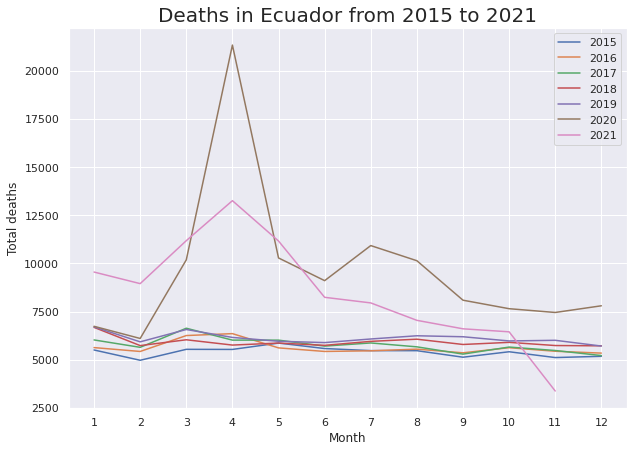

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
for i in range(len(deaths_month)):
    plt.plot(deaths_month[i].index, deaths_month[i].total)
plt.legend(['2015', '2016', '2017', '2018', '2019', '2020', '2021'])
plt.title('Deaths in Ecuador from 2015 to 2021', size=20)
plt.xlabel('Month')
plt.ylabel('Total deaths')
plt.xticks(np.arange(1, 13))
#plt.plot(df_deaths_moth_2015.index, df_deaths_moth_2015.total)
#plt.plot(df_deaths_moth_2016.index, df_deaths_moth_2016.total)


### 2015 to 2019

In [ ]:
df_deaths_2015_2019 = df_deaths.query('year <= 2019')

In [ ]:
df_deaths_2015_2019_grouped = df_deaths_2015_2019.groupby(['provincia', 'year'])[['total']].sum().sort_values(by=['total'], ascending=False)

I get the median for the years without pandemic. The previous plot shows they behave in a similar way, so I decided to group them apart and get their median. 

I add the same population than 2020 and 2021, due to there haven't been a census since 2010.

In [ ]:
provinces_2015_2019 = df_deaths_2015_2019_grouped.reset_index().groupby('provincia')[['total']].median()

In [ ]:
#You'll find population_province below

provinces_2015_2019['poblacion'] = population_province['poblacion']

In [ ]:
provinces_2015_2019.dropna(inplace=True)

In [ ]:
provinces_2015_2019['death_per_1000'] = (provinces_2015_2019['total'] / provinces_2015_2019['poblacion']) * 1000

In [ ]:
provinces_2015_2019.describe()

,total,poblacion,death_per_1000
count,24.000000,2.400000e+01,24.000000
mean,2886.208333,7.278640e+05,3.392564
std,4488.399472,1.021291e+06,0.904587
min,44.000000,3.304200e+04,1.331639
25%,549.750000,1.941185e+05,2.557169
50%,1597.000000,4.824865e+05,3.721214
75%,2716.500000,6.222500e+05,4.013302
max,19957.000000,4.387434e+06,4.548672


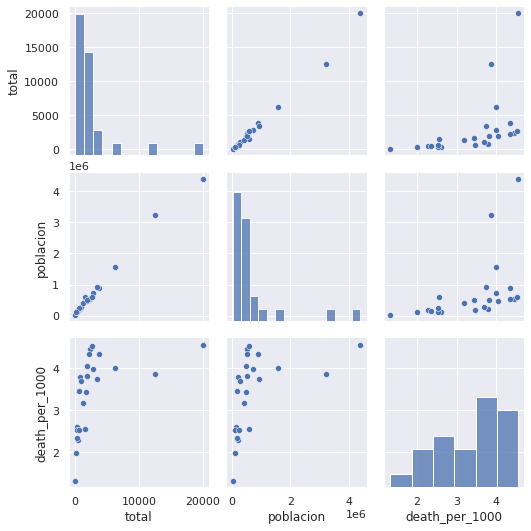

In [ ]:
sns.pairplot(provinces_2015_2019)

### 2020 and 2021

2020 and 2021 are the 'outliers'. Here we have a pandemic. So it's better to analyze those years apart.

In [ ]:
total_deaths_2020 = df_deaths_2020.groupby(['provincia'])[['total']].sum().sort_values(by=['total'], ascending=False)

In [ ]:
total_deaths_2021 = df_deaths_2021.groupby(['provincia'])[['total']].sum().sort_values(by=['total'], ascending=False)

In [ ]:
#Population is the same for 2020 and 2021 and the previous years (2015-2019)
population_province = df_deaths_2020.groupby('provincia')[['poblacion']].max()

In [ ]:
provinces_2020 = total_deaths_2020.join(population_province, how='outer')

In [ ]:
provinces_2020['death_per_1000'] = (provinces_2020['total'] / provinces_2020['poblacion']) * 1000

In [ ]:
provinces_2020

,total,poblacion,death_per_1000
provincia,,,
Azuay,5184,881394.0,5.881592
Bolívar,1112,209933.0,5.296928
Carchi,978,186869.0,5.233613
Cañar,1529,281396.0,5.433624
Chimborazo,3429,524004.0,6.543843
Cotopaxi,2564,488716.0,5.246401
El Oro,5039,715751.0,7.040158
Esmeraldas,2298,591083.0,3.887779
Galápagos,51,33042.0,1.543490


In [ ]:
provinces_2020.describe()

,total,poblacion,death_per_1000
count,24.000000,2.400000e+01,24.000000
mean,4825.500000,7.278640e+05,5.314494
std,8331.707675,1.021291e+06,1.644670
min,51.000000,3.304200e+04,1.543490
25%,866.500000,1.941185e+05,4.014204
50%,2637.000000,4.824865e+05,5.536409
75%,4368.500000,6.222500e+05,6.309237
max,38668.000000,4.387434e+06,8.813352


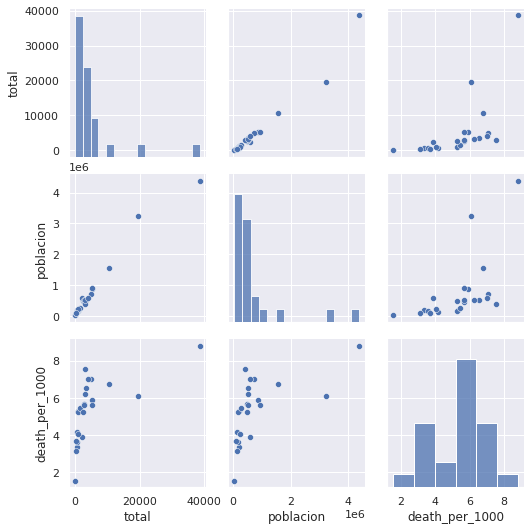

In [ ]:
sns.pairplot(provinces_2020)

****

In [ ]:
provinces_2021 = total_deaths_2021.join(population_province, how='outer')

In [ ]:
provinces_2021['death_per_1000'] = (provinces_2021['total'] / provinces_2021['poblacion']) * 1000

In [ ]:
provinces_2021

,total,poblacion,death_per_1000
provincia,,,
Azuay,4896,881394.0,5.554837
Bolívar,1046,209933.0,4.982542
Carchi,980,186869.0,5.244316
Cañar,1328,281396.0,4.719328
Chimborazo,2899,524004.0,5.532401
Cotopaxi,2446,488716.0,5.004952
El Oro,4412,715751.0,6.164155
Esmeraldas,2097,591083.0,3.547725
Galápagos,67,33042.0,2.027722


In [ ]:
provinces_2021.describe()

,total,poblacion,death_per_1000
count,24.000000,2.400000e+01,24.000000
mean,3907.291667,7.278640e+05,4.646244
std,5981.887578,1.021291e+06,1.202033
min,67.000000,3.304200e+04,2.027722
25%,760.250000,1.941185e+05,3.616831
50%,2271.500000,4.824865e+05,5.066584
75%,3896.750000,6.222500e+05,5.491540
max,26062.000000,4.387434e+06,6.307145


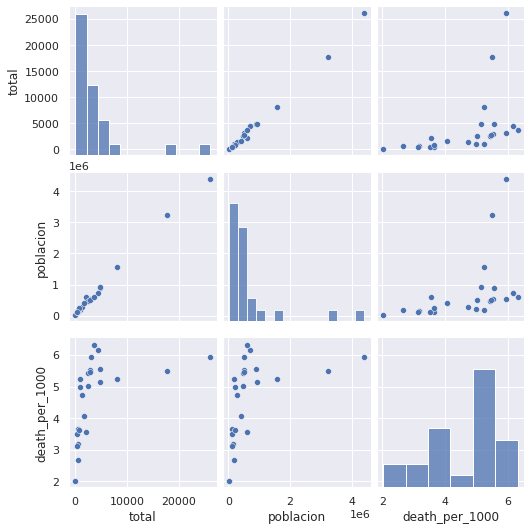

In [ ]:
sns.pairplot(provinces_2021)

## Enriched data

As I analyzed the data, it turns out I enriched the data to perform specific analyses. I think this data coud be clustered with K-means. But that's for another notebook.

In [ ]:
provinces_2015_2019.to_csv('/work/covid-19_ecuador/data/interim/deaths_prov_2015_2019.csv', index=False)
provinces_2020.to_csv('/work/covid-19_ecuador/data/interim/deaths_prov_2020.csv', index=False)
provinces_2021.to_csv('/work/covid-19_ecuador/data/interim/deaths_prov_2021.csv', index=False)

## Comparison: 2015-2019 vs 2020-2021

In [ ]:
conjunto = 2019
for i in [provinces_2015_2019, provinces_2020, provinces_2021]:
    print(conjunto)
    print(i.describe())
    print('\n')
    conjunto += 1

2019
              total     poblacion  death_per_1000
count     24.000000  2.400000e+01       24.000000
mean    2886.208333  7.278640e+05        3.392564
std     4488.399472  1.021291e+06        0.904587
min       44.000000  3.304200e+04        1.331639
25%      549.750000  1.941185e+05        2.557169
50%     1597.000000  4.824865e+05        3.721214
75%     2716.500000  6.222500e+05        4.013302
max    19957.000000  4.387434e+06        4.548672


2020
              total     poblacion  death_per_1000
count     24.000000  2.400000e+01       24.000000
mean    4825.500000  7.278640e+05        5.314494
std     8331.707675  1.021291e+06        1.644670
min       51.000000  3.304200e+04        1.543490
25%      866.500000  1.941185e+05        4.014204
50%     2637.000000  4.824865e+05        5.536409
75%     4368.500000  6.222500e+05        6.309237
max    38668.000000  4.387434e+06        8.813352


2021
              total     poblacion  death_per_1000
count     24.000000  2.400000e+

2019
2020
2021


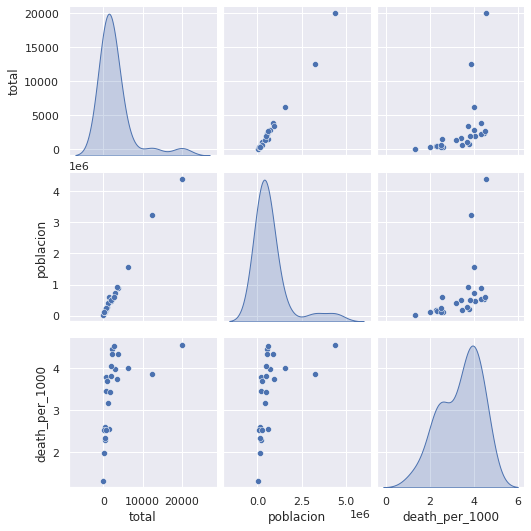

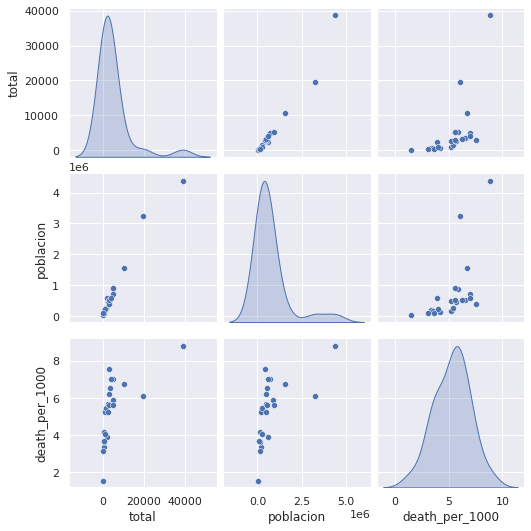

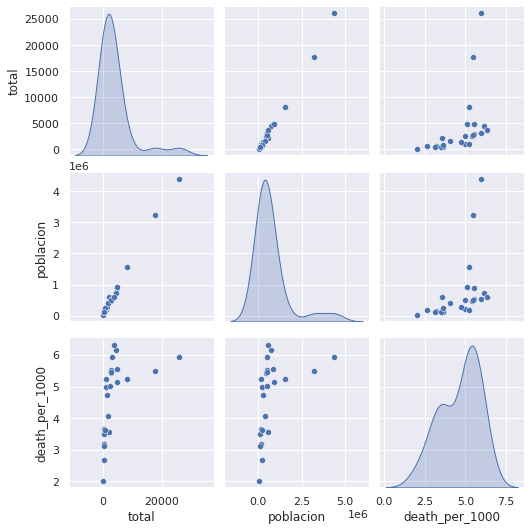

In [ ]:
counter = 2019
for i in [provinces_2015_2019, provinces_2020, provinces_2021]:
    print(counter)
    sns.pairplot(i, diag_kind='kde')
    counter += 1

2015-2019


<AxesSubplot:>

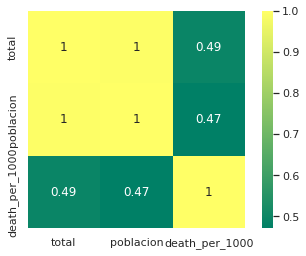

In [ ]:
print('2015-2019')
sns.heatmap(provinces_2015_2019.corr(), 
annot=True,
square=True,
cmap='summer')

2020


<AxesSubplot:>

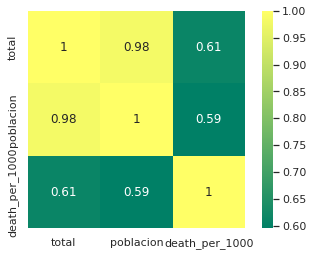

In [ ]:
print('2020')
sns.heatmap(provinces_2020.corr(), 
annot=True,
square=True,
cmap='summer')

2021


<AxesSubplot:>

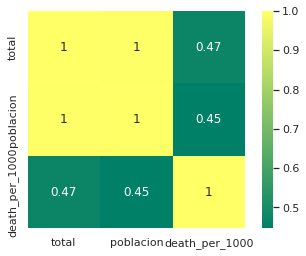

In [ ]:
print('2021')
sns.heatmap(provinces_2021.corr(), 
annot=True,
square=True,
cmap='summer')

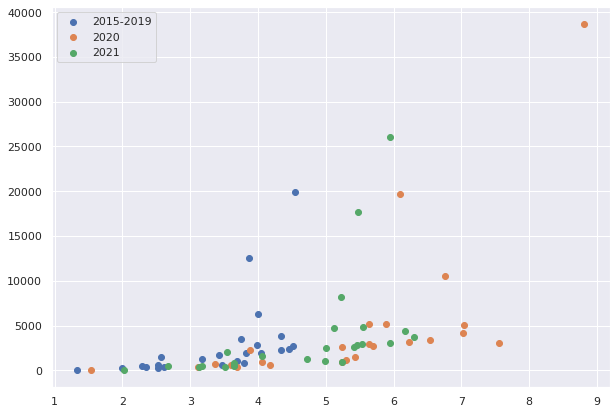

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.scatter(provinces_2015_2019['death_per_1000'], provinces_2015_2019['total'])
plt.scatter(provinces_2020['death_per_1000'], provinces_2020['total'])
plt.scatter(provinces_2021['death_per_1000'], provinces_2021['total'])
plt.legend(['2015-2019', '2020', '2021'])

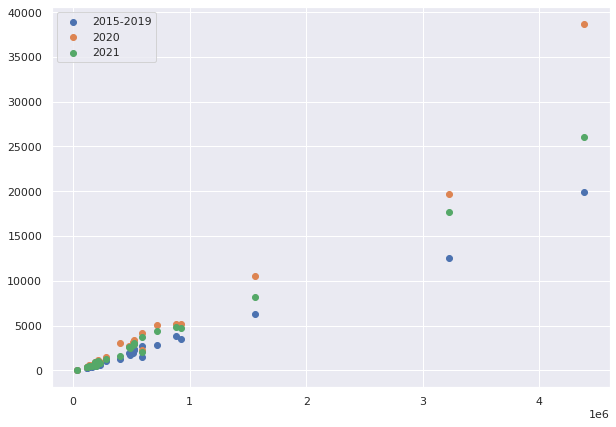

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.scatter(provinces_2015_2019['poblacion'], provinces_2015_2019['total'])
plt.scatter(provinces_2020['poblacion'], provinces_2020['total'])
plt.scatter(provinces_2021['poblacion'], provinces_2021['total'])
plt.legend(['2015-2019', '2020', '2021'])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=298bb443-d8b3-4731-ae95-ca4418ea078f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>